# Libraries & Google Connections

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time, date
from pytz import timezone, utc
from time import gmtime
import re
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
import pickle
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
COLAB = True

In [ ]:
if COLAB:

# Getting the id code for sharing files in Drive
    id_employee_attrition = '1St5COx5m2MzKcjCKszZ-P3G7y9Q1Z4X_' 


# Reading the files and saving in contents
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id = id_employee_attrition,
                                      dest_path = './HR-Employee-Attrition.csv')

In [ ]:
# Showing all rows for the dataset
# show_all_rows = pd.set_option("display.max_rows", None)

# Showing all columns for the dataset
show_all_cols = pd.set_option('display.max_columns', None)

# Attrition

# Dataset

## Reading data

In [ ]:
df_employ = pd.read_csv('HR-Employee-Attrition.csv')

## Checking data, nulls and distribution 

In [ ]:
# Data distribution
df_employ.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Null/missing values
print(f'Missing values in the data set: {df_employ.isnull().values.any()}')

Missing values in the data set: False


In [ ]:
# Check for null values of each variables
for c in df_employ.columns:
  if df_employ[c].isna().sum() == 0:
    print(f'{c}: No nulls')
  else:
    df_employ[c].isna().sum()

Age: No nulls
Attrition: No nulls
BusinessTravel: No nulls
DailyRate: No nulls
Department: No nulls
DistanceFromHome: No nulls
Education: No nulls
EducationField: No nulls
EmployeeCount: No nulls
EmployeeNumber: No nulls
EnvironmentSatisfaction: No nulls
Gender: No nulls
HourlyRate: No nulls
JobInvolvement: No nulls
JobLevel: No nulls
JobRole: No nulls
JobSatisfaction: No nulls
MaritalStatus: No nulls
MonthlyIncome: No nulls
MonthlyRate: No nulls
NumCompaniesWorked: No nulls
Over18: No nulls
OverTime: No nulls
PercentSalaryHike: No nulls
PerformanceRating: No nulls
RelationshipSatisfaction: No nulls
StandardHours: No nulls
StockOptionLevel: No nulls
TotalWorkingYears: No nulls
TrainingTimesLastYear: No nulls
WorkLifeBalance: No nulls
YearsAtCompany: No nulls
YearsInCurrentRole: No nulls
YearsSinceLastPromotion: No nulls
YearsWithCurrManager: No nulls


In [ ]:
# Featuring travel feature
BusinessTravel = []

for y in df_employ['BusinessTravel']:
    if y == 'Non-Travel' or y == 'Travel_Rarely':
        BusinessTravel.append('Travel_Rarely')
    else:
        BusinessTravel.append('Travel_Frequently')

df_employ['BusinessTravel'] = BusinessTravel

In [ ]:
# Values for object variables
for x in df_employ.columns:
    if df_employ[x].dtype == object:
        print(str(x) +':'+ str(df_employ[x].unique()))
        print(df_employ[x].value_counts())
        print('_______________________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1193
Travel_Frequently     277
Name: BusinessTravel, dtype: int64
_______________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_______________________________________
JobRole:['Sales Executive' 'Research S

## Plotting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

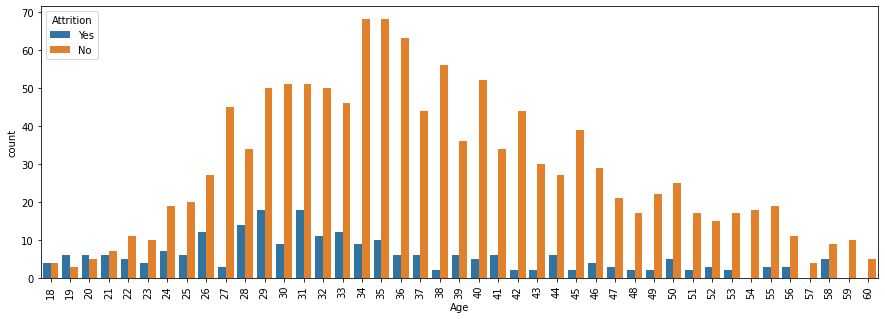

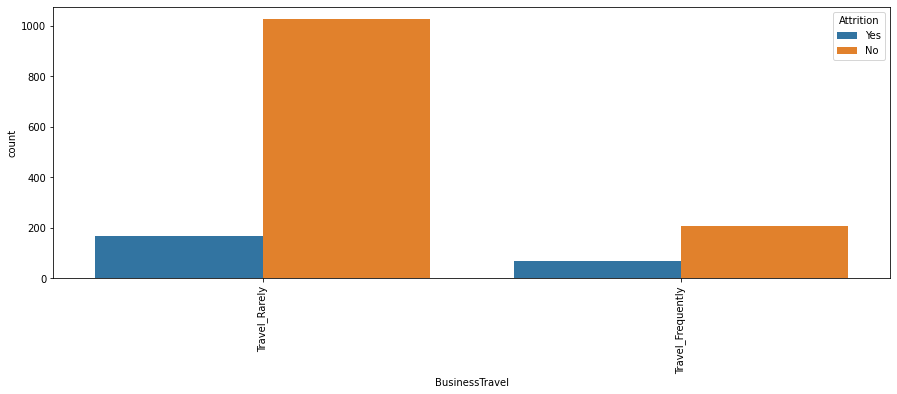

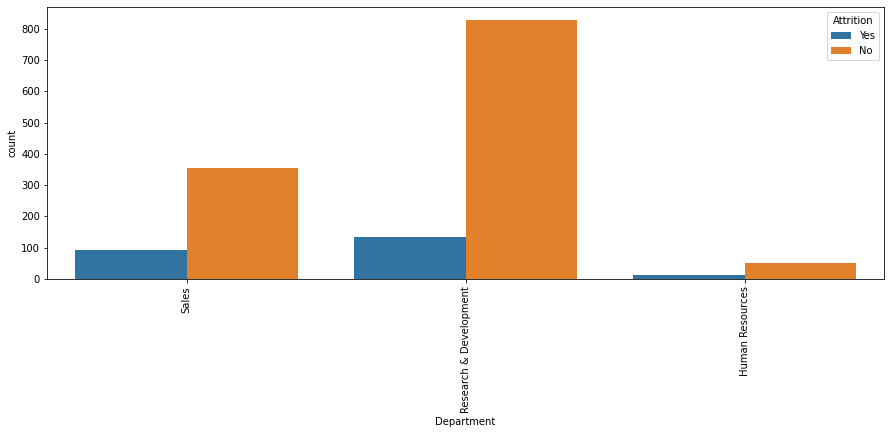

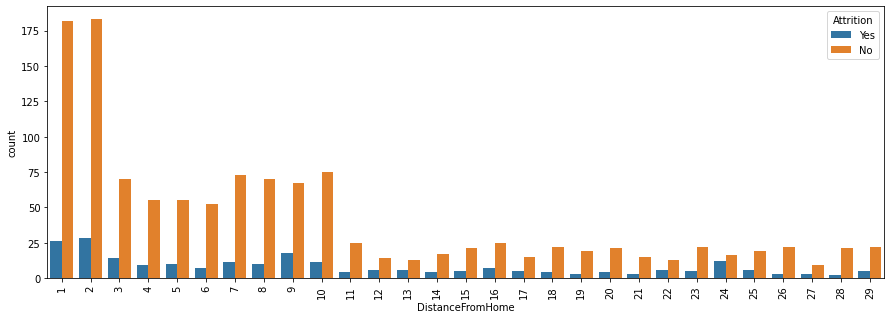

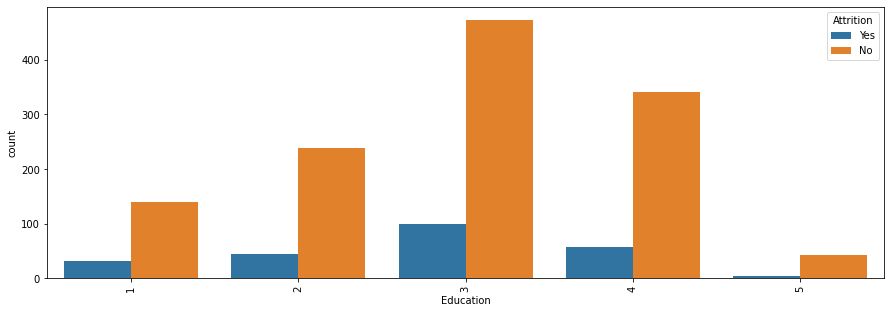

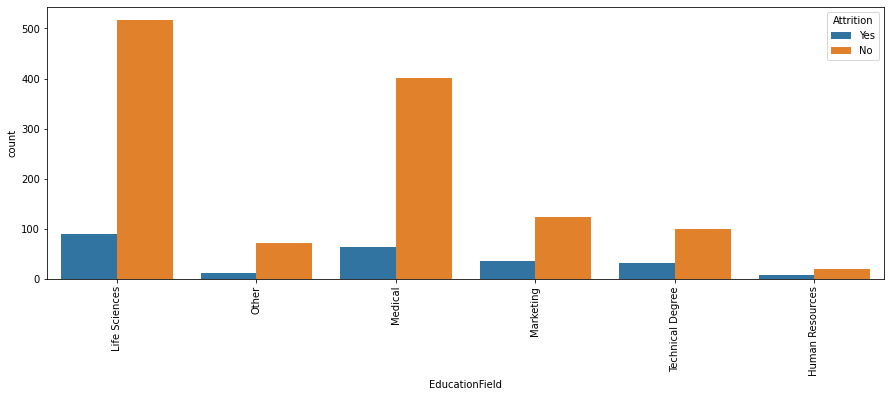

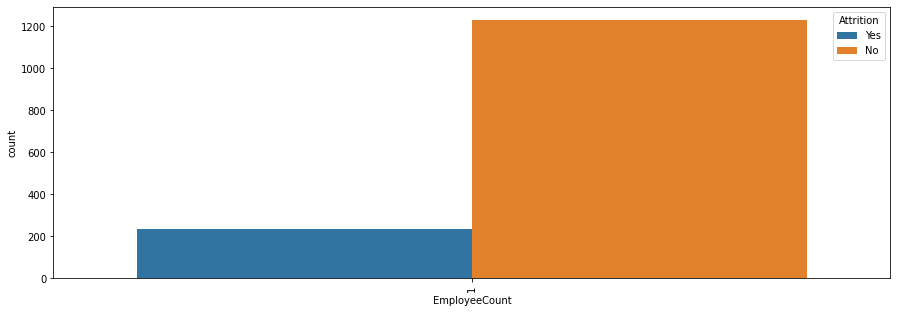

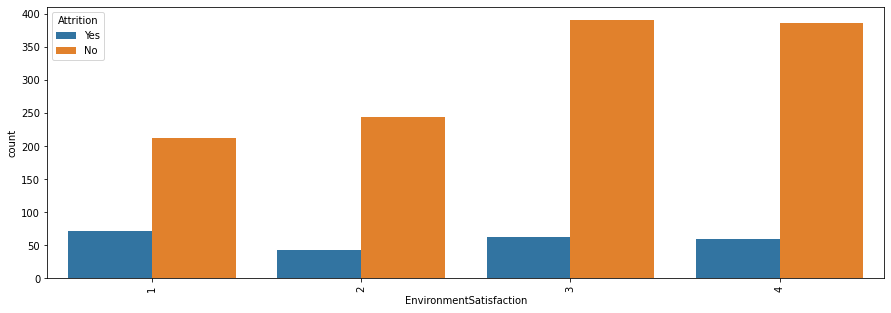

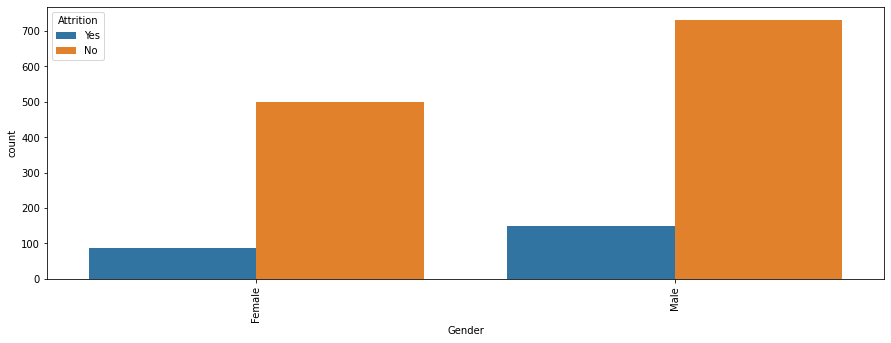

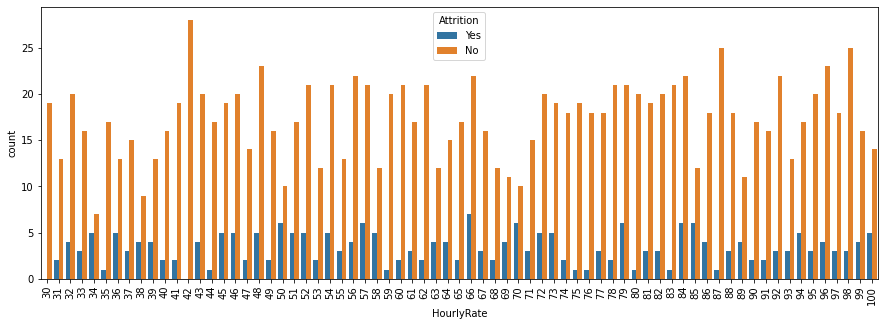

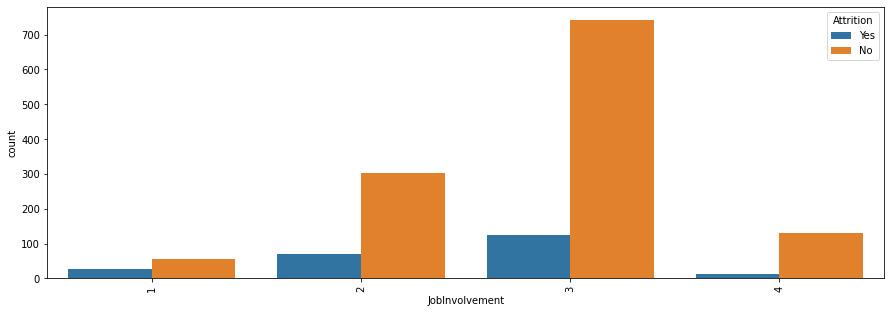

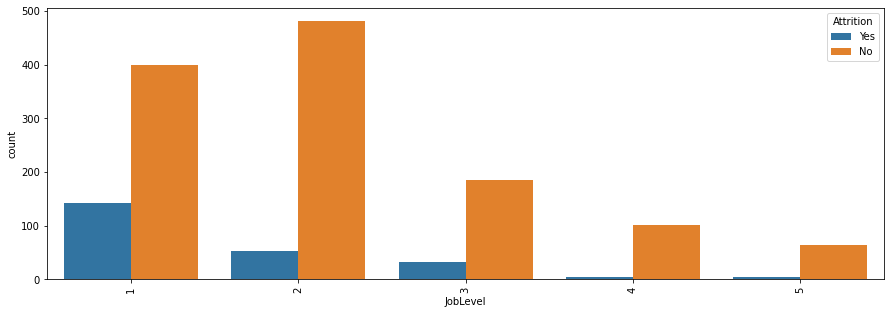

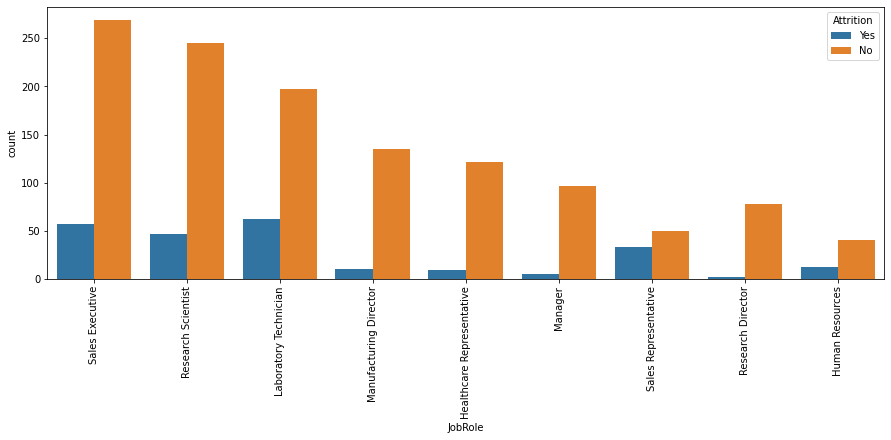

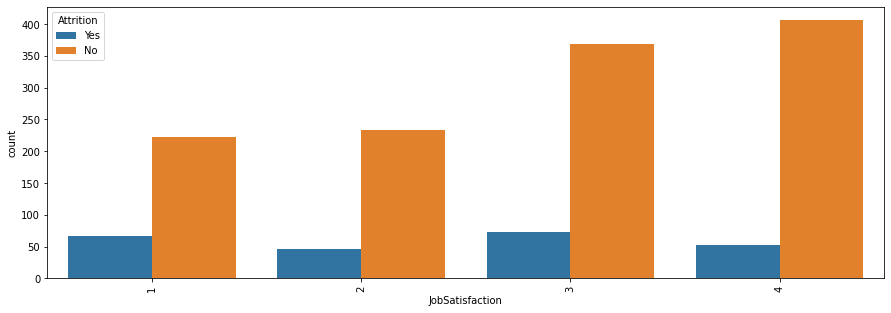

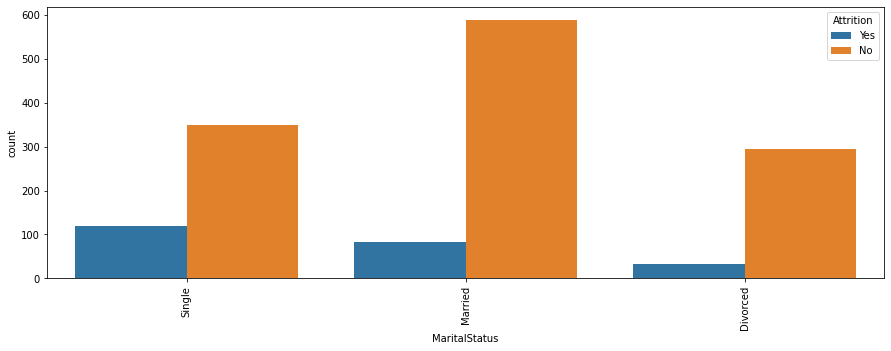

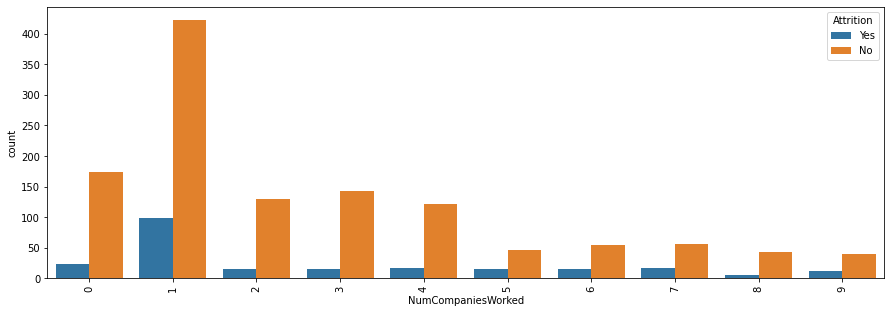

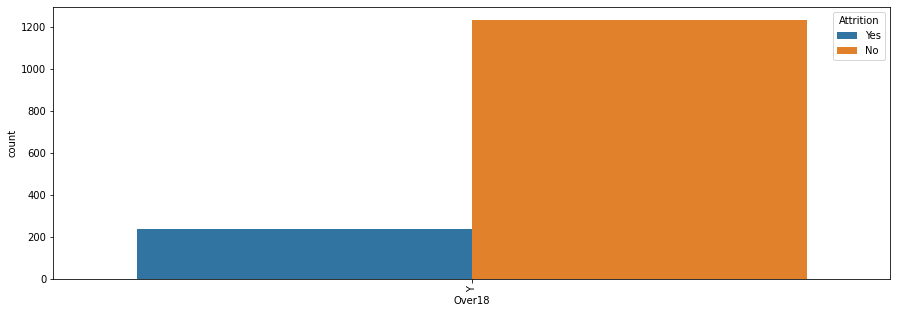

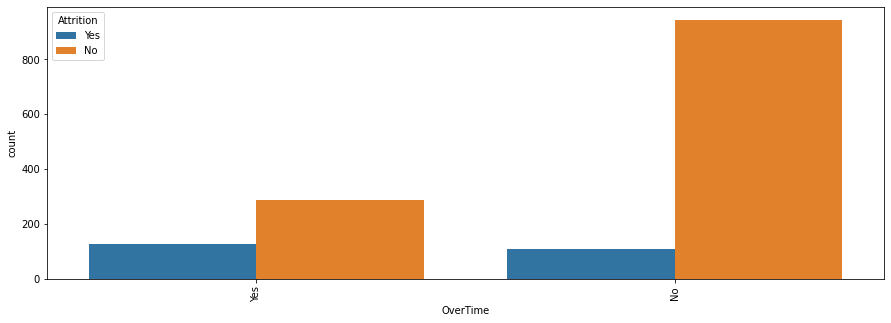

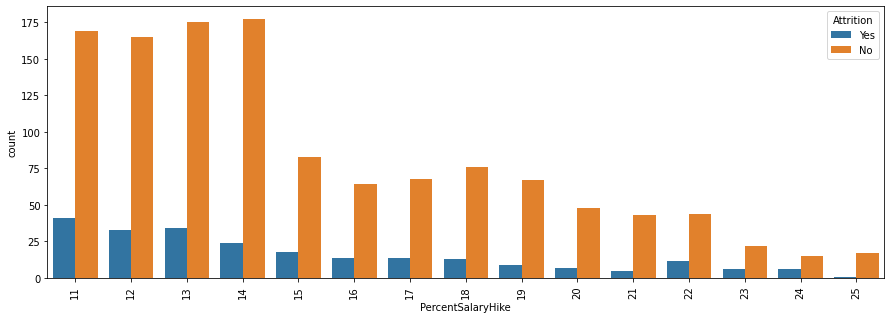

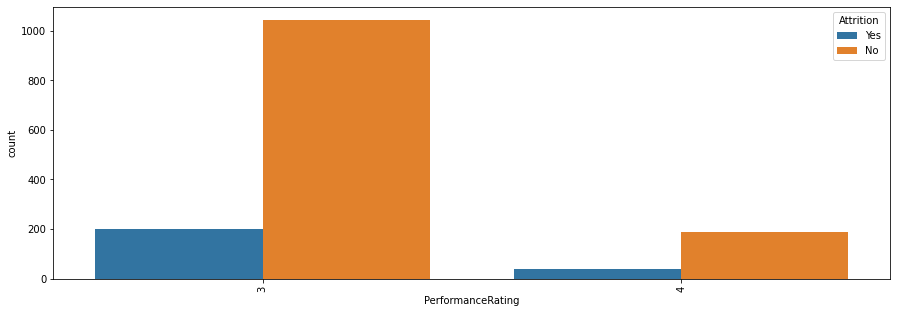

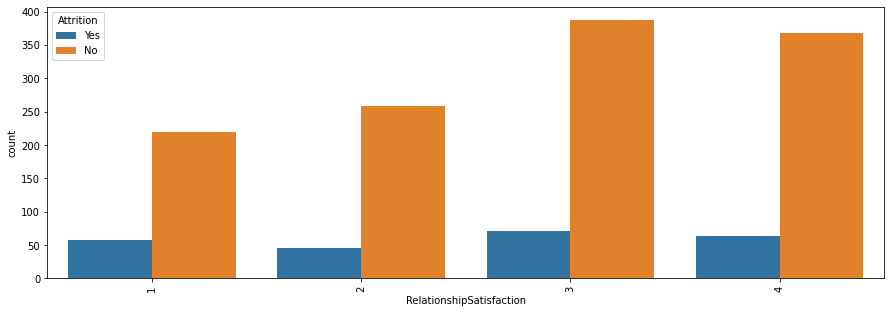

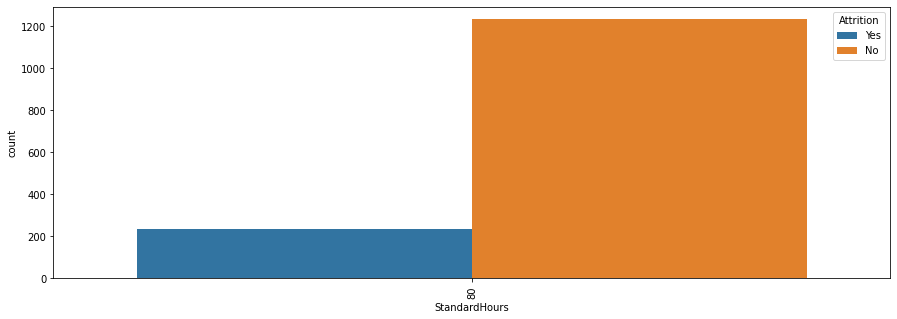

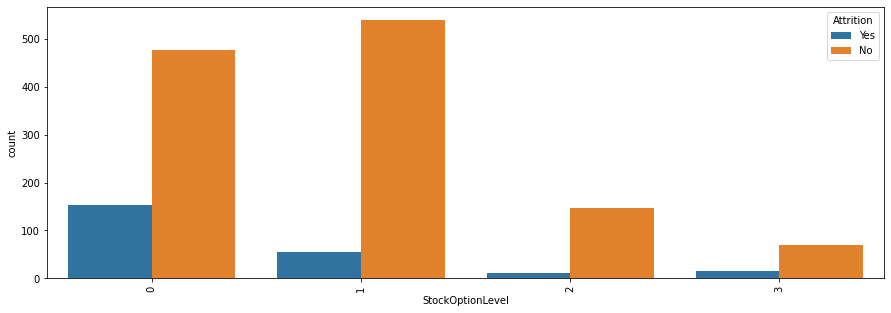

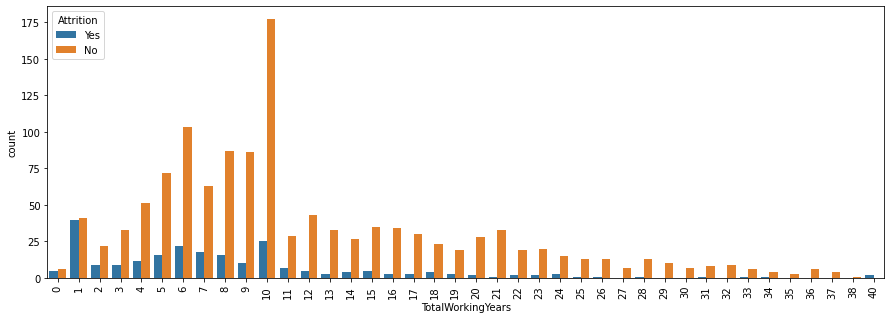

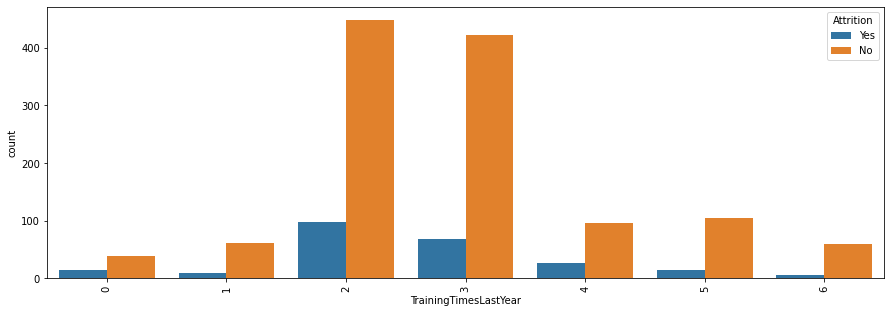

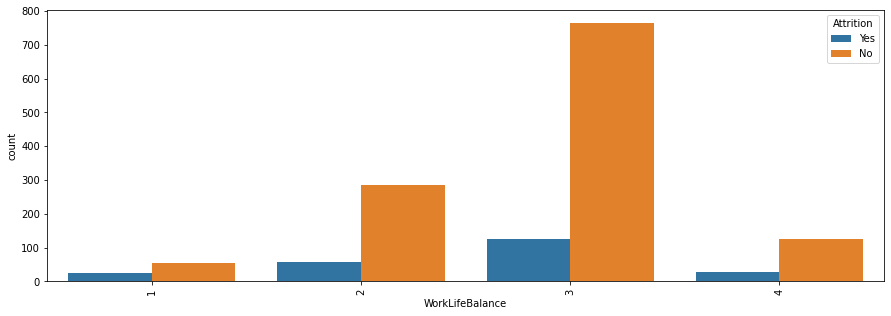

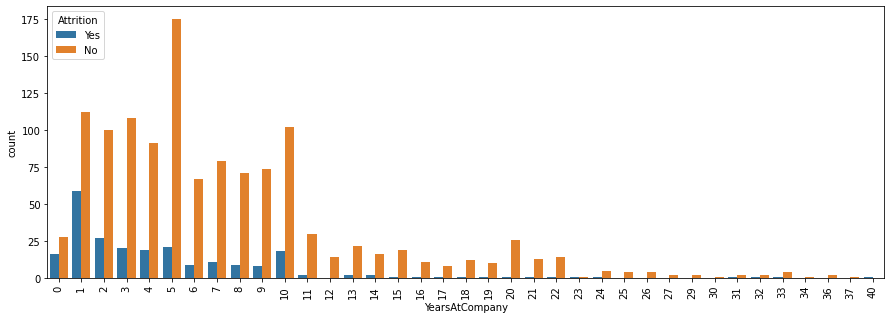

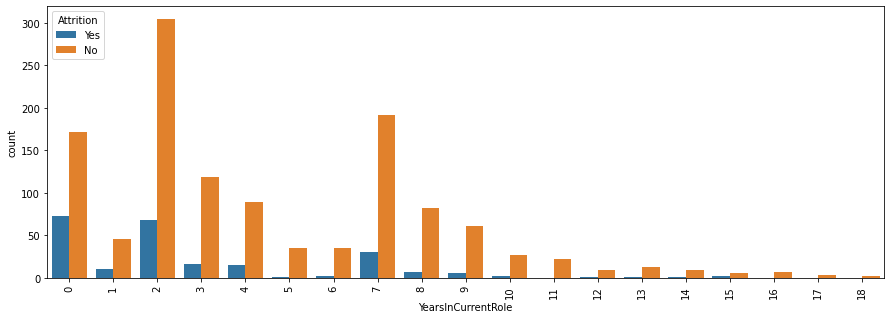

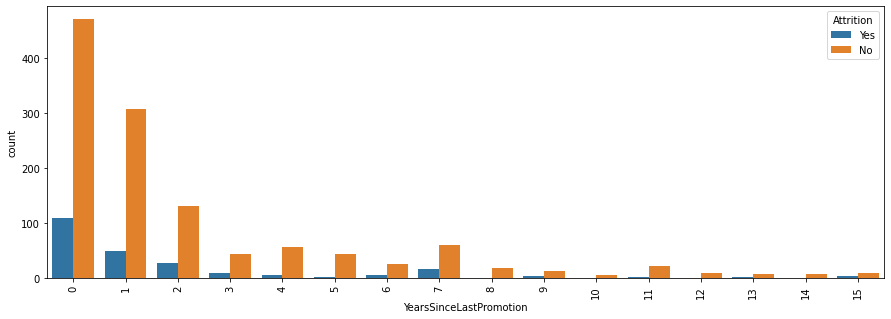

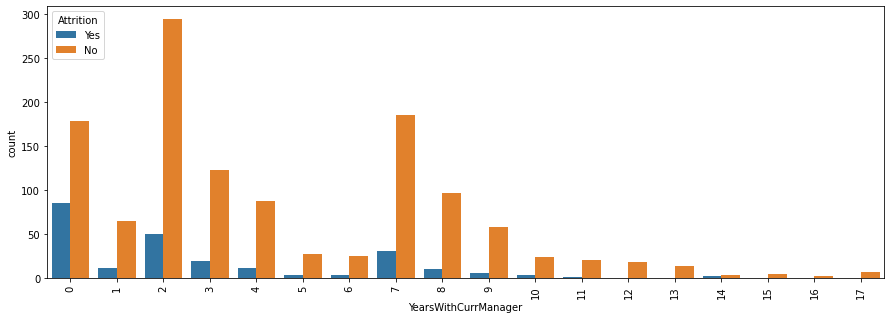

In [ ]:
for d in df_employ.drop(columns=['Attrition', 'DailyRate', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate']).columns:
  plt.figure(figsize=(15,5))
  sns.countplot(x=d, hue='Attrition', data=df_employ)
  plt.xticks(rotation=90)
  

In [ ]:
df_employee = df_employ.copy()

## Transform data

In [ ]:
# Transoform data
# Transform non-numerical into numerical cols
from sklearn.preprocessing import LabelEncoder

for label in df_employee.columns:
    if df_employee[label].dtype == 'int64':
        continue
    else:
      df_employee[label] = LabelEncoder().fit_transform(df_employee[label])

## Correlation data

In [ ]:
fig = px.imshow(df_employee.corr(), labels = dict(color="Value"), width=1000, height=900, title='Correlation data for Employee Features')
fig.show()

## Dropping columns & clean data

In [ ]:
# dropping columns
drop_col = ['Gender', 'MaritalStatus', 'EmployeeNumber', 'EmployeeCount', 'Over18']
df_clean = df_employee.drop(columns = drop_col)

# Machine Learning

## Splitting Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=0)

In [ ]:
X_train = df_train.drop(columns=['Attrition'])
y_train = df_train['Attrition']

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train, y_train)

# Scoring Model
scoring_model = logistic.score(X_train, y_train)

# Test
X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']

y_pred=logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



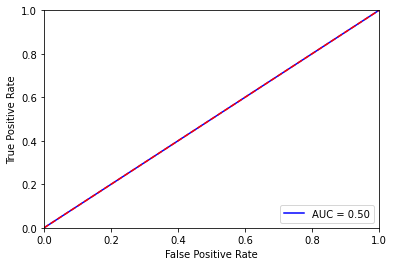

In [ ]:
# Metric for knowing how good is the model. The Curve ROC show the true % of rigth predicctions
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted NO', 'Predicted YES'],
    index  =['True NO', 'True YES']
)
print(conf)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

          Predicted NO  Predicted YES
True NO            371              0
True YES            70              0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Why does model predict so bad?
print(f'Count of data for 0 value: {df_clean["Attrition"].loc[df_clean["Attrition"] == 0].count()}') 
print(f'Count of data for 1 value: {df_clean["Attrition"].loc[df_clean["Attrition"] == 1].count()}')
print(f'Total values: {df_clean.shape[0]}')

Count of data for 0 value: 1233
Count of data for 1 value: 237
Total values: 1470


## Undersampling or Oversampling
Undersampling: you drop observations of the majority class that may loss some info

Oversampling: Duplicate de data for minority class that may make overfitting

In [ ]:
# UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_unders, y_unders = under_sampler.fit_resample(X_train, y_train)

### Logistic Regression

In [ ]:
# Train model logistoc regression
logistic = LogisticRegression(random_state = 42)
logistic.fit(X_unders, y_unders)

# Scoring Model
scoring_model = logistic.score(X_unders, y_unders)

# Test
X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']

y_pred=logistic.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



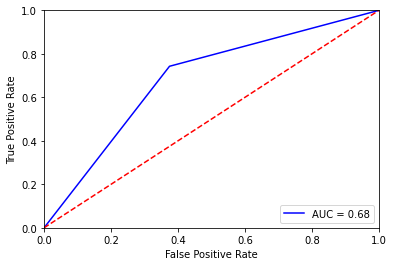

In [ ]:
# Metric for knowing how good is the model. The Curve ROC show the true % of rigth predicctions
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted NO', 'Predicted YES'],
    index  =['True NO', 'True YES']
)
print(conf)

              precision    recall  f1-score   support

           0       0.93      0.63      0.75       371
           1       0.27      0.74      0.40        70

    accuracy                           0.64       441
   macro avg       0.60      0.68      0.57       441
weighted avg       0.82      0.64      0.69       441

          Predicted NO  Predicted YES
True NO            232            139
True YES            18             52


## Finding the best Hyperparameters

### Logistic Regression (Best One)

In [ ]:
model_CV = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['l1', 'l2'], 'max_iter': [100,200,300],
              'C':[0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]}


CV_rlog = GridSearchCV(estimator= model_CV, param_grid=param_grid, cv= 3)
CV_rlog.fit(X_unders, y_unders)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
# best parameters
# Train model RandomForest
params_rlog = CV_rlog.best_params_

rlog = LogisticRegression(**params_rlog)
rlog.fit(X_unders, y_unders)

# Test
X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']

y_pred=rlog.predict(X_test)


predictions = pd.DataFrame(rlog.predict(X_test), columns=['Predict Attrition'])
perc_prob = pd.DataFrame(rlog.predict_proba(X_test), columns=['%no', '%yes'])

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted NO', 'Predicted YES'],
    index  =['True NO', 'True YES']
)
print(conf)


              precision    recall  f1-score   support

           0       0.95      0.69      0.80       371
           1       0.33      0.80      0.47        70

    accuracy                           0.71       441
   macro avg       0.64      0.75      0.63       441
weighted avg       0.85      0.71      0.75       441

          Predicted NO  Predicted YES
True NO            257            114
True YES            14             56


In [ ]:
recall0 = np.round(257/(257 + 114), 2)
recall1 = np.round(56/(56 + 14), 2)

print(f'Recall 0: {recall0}')
print(f'Recall 1: {recall1}')
print(f'Recall AVG: {(recall0 + recall1)/2}')

Recall 0: 0.69
Recall 1: 0.8
Recall AVG: 0.745


In [ ]:
# Get coefficients for dependests varaibles and for independent (Attrition) varaible

coef = rlog.coef_.squeeze()
b = rlog.intercept_
print(f'Independent variable: {b}')
print(f'Dependent variable: {coef}')

Independent variable: [2.27997136]
Dependent variable: [-1.63612375e-02 -1.03006617e+00  1.43467337e-05  1.41013581e+00
  4.82061664e-02  5.74007865e-02  1.05367588e-01 -4.08846636e-01
  2.84773170e-03 -3.16045312e-01 -3.23949772e-01 -1.67564282e-01
 -3.98800033e-01 -5.15737322e-05  1.42512186e-05  4.95096153e-02
  1.78749023e+00 -5.66421527e-02  3.12754698e-01 -2.77709678e-01
  3.11244667e-02 -1.47319299e-01 -3.80498447e-02 -9.71453853e-02
 -4.40611829e-01  1.30737935e-01 -1.65506627e-01  1.47816427e-01
 -1.53473923e-01]


In [ ]:
df_coef = pd.DataFrame(zip(X_train.columns, np.transpose(coef)), columns=['features', 'coef'])

In [ ]:
# import math
# def get_prob (index_variable, value_variable):
#   formula = 1/(1+math.e**(-(b + coef[index_variable]*value_variable)))
#   return formula

# Saving Model

In [ ]:
from joblib import dump, load

In [ ]:
# Saving the Logistic model
dump(rlog, 'logistic.pkl') 

['logistic.pkl']